In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving aqi_results.csv to aqi_results.csv


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/aqi_results.csv')  # Change this to the name of your uploaded file


In [ ]:
# Check the first few rows of the DataFrame
print(df.head())

# Convert AQI_Level to numerical categories
df['AQI_Level'] = df['AQI_Level'].astype('category').cat.codes

# Separate features and target variable
X = df[['CO', 'NO2', 'Ozone', 'SO2']]
y = df['AQI_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


       CO    NO2   Ozone    SO2         AQI  AQI_Level
0    0.43  29.94   67.24  12.84   90.984000   Moderate
1    6.17  54.56   23.91  21.14   67.700000   Moderate
2  120.56  16.40  147.99  13.01  301.000000  Hazardous
3  130.76  62.37   67.27  16.76  301.000000  Hazardous
4    3.97  66.83   66.53  18.96   88.664667   Moderate


In [ ]:
# Train the SVM Model
svm_model = SVC(kernel='linear')  # You can also use 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Evaluate the Model
y_pred = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       1.00      0.99      1.00       108
           2       0.82      0.90      0.86        72
           3       0.80      0.67      0.73         6
           4       0.79      0.48      0.59        23
           5       0.97      0.97      0.97        33

    accuracy                           0.92       308
   macro avg       0.88      0.83      0.85       308
weighted avg       0.92      0.92      0.92       308

Accuracy Score: 0.922077922077922


In [ ]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, df.loc[y_train.index, 'AQI_Level'])  # Use AQI_Level for classification

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results:")
print("Classification Report:")
print(classification_report(df.loc[y_test.index, 'AQI_Level'], y_pred_rf))
print("Accuracy Score:", accuracy_score(df.loc[y_test.index, 'AQI_Level'], y_pred_rf))


Random Forest Results:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       1.00      1.00      1.00       108
           2       1.00      0.99      0.99        72
           3       0.86      1.00      0.92         6
           4       0.96      1.00      0.98        23
           5       1.00      1.00      1.00        33

    accuracy                           0.99       308
   macro avg       0.97      1.00      0.98       308
weighted avg       0.99      0.99      0.99       308

Accuracy Score: 0.9935064935064936


In [ ]:

from sklearn.tree import DecisionTreeClassifier


# Step 3: Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt_model.predict(X_test)

# Step 4: Evaluate the Model
print("Decision Tree Results:")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))


Decision Tree Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00         6
           4       1.00      0.96      0.98        23
           5       1.00      1.00      1.00        33

    accuracy                           1.00       308
   macro avg       1.00      0.99      1.00       308
weighted avg       1.00      1.00      1.00       308

Accuracy Score: 0.9967532467532467


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_gb = gb_model.predict(X_test)


print("Gradient Boosting Results:")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Results:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       1.00      1.00      1.00       108
           2       0.97      1.00      0.99        72
           3       1.00      1.00      1.00         6
           4       1.00      0.96      0.98        23
           5       1.00      1.00      1.00        33

    accuracy                           0.99       308
   macro avg       1.00      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

Accuracy Score: 0.9935064935064936


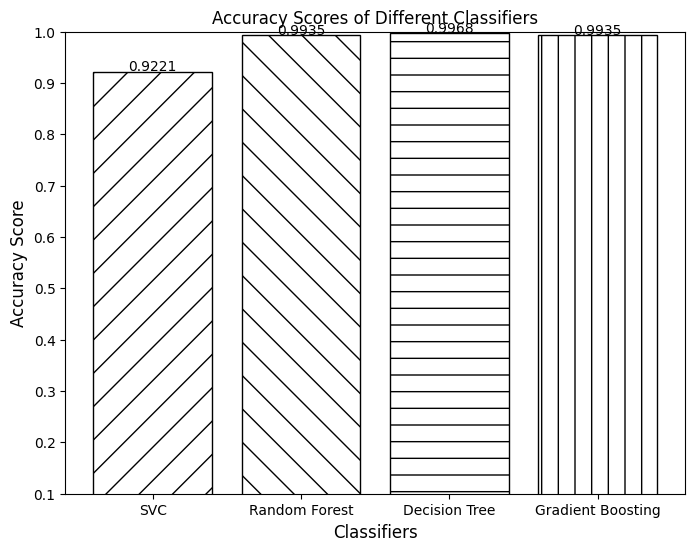

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for the classifiers
models = ['SVC', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
accuracy_scores = [0.9221, 0.9935, 0.9968, 0.9935]

# Define different straight line hatch patterns for each bar
hatch_patterns = ['/', '\\', '-', '|']

# Create a smaller bar plot
plt.figure(figsize=(8, 6))  # Adjust the size as needed
for i in range(len(models)):
    plt.bar(models[i], accuracy_scores[i], color='none', hatch=hatch_patterns[i], edgecolor='black')

# Adding titles and labels
plt.title('Accuracy Scores of Different Classifiers', fontsize=12)
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

# Display the accuracy values on top of each bar
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.002, f'{score:.4f}', ha='center', fontsize=10)

# Set the y-axis limit for better readability
plt.ylim(0.1, 1.0)

# Show the plot
plt.show()





In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Ensure this is imported
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Upload the CSV file (if using Google Colab)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/drive/MyDrive/air_quality/aqi_results .csv')  # Change this to the name of your uploaded file

# Data preprocessing steps
df['AQI_Level'] = df['AQI_Level'].astype('category').cat.codes  # Convert AQI_Level to numerical categories

# Separate features and target variable
X = df[['CO', 'NO2', 'Ozone', 'SO2']]  # Assuming these are your feature columns
y = df['AQI_Level']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 1: Create lists to track training accuracy and training loss
train_accuracy = []
train_loss = []

# SVM Model (Track accuracy and loss)
svm_model = SVC(kernel='linear', probability=True)  # Enabling probability to calculate log_loss
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_train_pred_prob_svm = svm_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_svm))
train_loss.append(log_loss(y_train, y_train_pred_prob_svm))

# Random Forest Model (Track accuracy and loss)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_prob_rf = rf_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_rf))
train_loss.append(log_loss(y_train, y_train_pred_prob_rf))

# Decision Tree Model (Track accuracy and loss)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_train_pred_prob_dt = dt_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_dt))
train_loss.append(log_loss(y_train, y_train_pred_prob_dt))

# Gradient Boosting Model (Track accuracy and loss)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_train_pred_gb = gb_model.predict(X_train)
y_train_pred_prob_gb = gb_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_gb))
train_loss.append(log_loss(y_train, y_train_pred_prob_gb))

# Step 2: Plotting training accuracy and loss on the same graph (with two y-axes)

fig, ax1 = plt.subplots(figsize=(8, 4))  # Smaller graph size

# Plotting Training Accuracy on the first y-axis
ax1.set_xlabel('Models')
ax1.set_ylabel('Training Accuracy', color='tab:blue')
ax1.plot(['SVM', 'Random Forest', 'Decision Tree', 'Gradient Boosting'], train_accuracy, marker='o', color='tab:blue', linestyle='-', linewidth=2, markersize=8)
ax1.set_xticks(np.arange(len(train_accuracy)))
ax1.set_xticklabels(['SVM', 'Random Forest', 'Decision Tree', 'Gradient Boosting'])
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot Training Loss
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.set_ylabel('Training Loss (Log Loss)', color='tab:red')
ax2.plot(['SVC', 'Random Forest', 'Decision Tree', 'Gradient Boosting'], train_loss, marker='o', color='tab:red', linestyle='-', linewidth=2, markersize=8)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding titles and grid
plt.title('Training Accuracy and Loss Comparison', fontsize=14)
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()




Saving aqi_results .csv to aqi_results .csv


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/air_quality/aqi_results .csv'

Saving aqi_results .csv to aqi_results  (5).csv


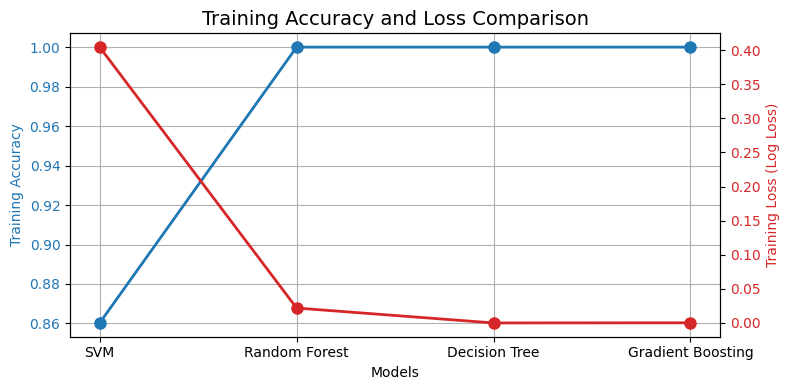

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Ensure this is imported
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Upload the CSV file (if using Google Colab)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/drive/MyDrive/air_quality/aqi_results .csv')  # Change this to the name of your uploaded file

# Data preprocessing steps
df['AQI_Level'] = df['AQI_Level'].astype('category').cat.codes  # Convert AQI_Level to numerical categories

# Separate features and target variable
X = df[['CO', 'NO2', 'Ozone', 'SO2']]  # Assuming these are your feature columns
y = df['AQI_Level']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 1: Create lists to track training accuracy and training loss
train_accuracy = []
train_loss = []

# SVM Model (Track accuracy and loss)
svm_model = SVC(kernel='linear', probability=True)  # Enabling probability to calculate log_loss
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_train_pred_prob_svm = svm_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_svm))
train_loss.append(log_loss(y_train, y_train_pred_prob_svm))

# Random Forest Model (Track accuracy and loss)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_prob_rf = rf_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_rf))
train_loss.append(log_loss(y_train, y_train_pred_prob_rf))

# Decision Tree Model (Track accuracy and loss)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_train_pred_prob_dt = dt_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_dt))
train_loss.append(log_loss(y_train, y_train_pred_prob_dt))

# Gradient Boosting Model (Track accuracy and loss)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_train_pred_gb = gb_model.predict(X_train)
y_train_pred_prob_gb = gb_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_gb))
train_loss.append(log_loss(y_train, y_train_pred_prob_gb))

# Step 2: Plotting training accuracy and loss on the same graph (with two y-axes)

fig, ax1 = plt.subplots(figsize=(8, 4))  # Smaller graph size

# Plotting Training Accuracy on the first y-axis
ax1.set_xlabel('Models')
ax1.set_ylabel('Training Accuracy', color='tab:blue')
ax1.plot(['SVM', 'Random Forest', 'Decision Tree', 'Gradient Boosting'], train_accuracy, marker='o', color='tab:blue', linestyle='-', linewidth=2, markersize=8)
ax1.set_xticks(np.arange(len(train_accuracy)))
ax1.set_xticklabels(['SVM', 'Random Forest', 'Decision Tree', 'Gradient Boosting'])
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot Training Loss
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.set_ylabel('Training Loss (Log Loss)', color='tab:red')
ax2.plot(['SVM', 'Random Forest', 'Decision Tree', 'Gradient Boosting'], train_loss, marker='o', color='tab:red', linestyle='-', linewidth=2, markersize=8)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding titles and grid
plt.title('Training Accuracy and Loss Comparison', fontsize=14)
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving aqi_results .csv to aqi_results  (2).csv


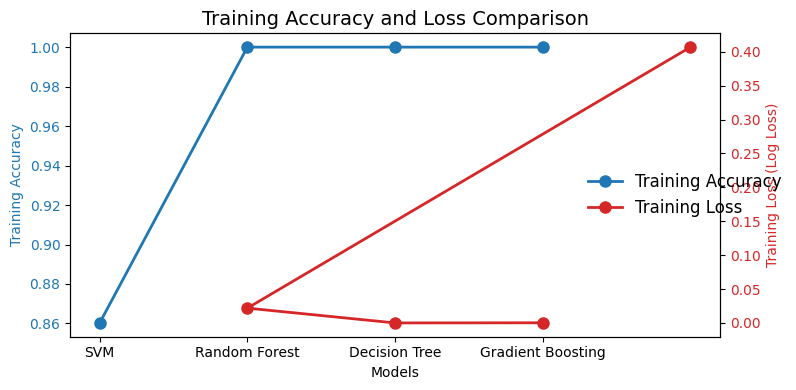

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Ensure this is imported
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Upload the CSV file (if using Google Colab)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/drive/MyDrive/air_quality/aqi_results .csv')  # Change this to the name of your uploaded file

# Data preprocessing steps
df['AQI_Level'] = df['AQI_Level'].astype('category').cat.codes  # Convert AQI_Level to numerical categories

# Separate features and target variable
X = df[['CO', 'NO2', 'Ozone', 'SO2']]  # Assuming these are your feature columns
y = df['AQI_Level']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 1: Create lists to track training accuracy and training loss
train_accuracy = []
train_loss = []

# SVM Model (Track accuracy and loss)
svm_model = SVC(kernel='linear', probability=True)  # Enabling probability to calculate log_loss
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_train_pred_prob_svm = svm_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_svm))
train_loss.append(log_loss(y_train, y_train_pred_prob_svm))

# Random Forest Model (Track accuracy and loss)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_prob_rf = rf_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_rf))
train_loss.append(log_loss(y_train, y_train_pred_prob_rf))

# Decision Tree Model (Track accuracy and loss)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_train_pred_prob_dt = dt_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_dt))
train_loss.append(log_loss(y_train, y_train_pred_prob_dt))

# Gradient Boosting Model (Track accuracy and loss)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_train_pred_gb = gb_model.predict(X_train)
y_train_pred_prob_gb = gb_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_gb))
train_loss.append(log_loss(y_train, y_train_pred_prob_gb))

# Step 2: Plotting training accuracy and loss on the same graph (with two y-axes)

fig, ax1 = plt.subplots(figsize=(8, 4))  # Smaller graph size

# Plotting Training Accuracy on the first y-axis
ax1.set_xlabel('Models')
ax1.set_ylabel('Training Accuracy', color='tab:blue')
ax1.plot(['SVM', 'Random Forest', 'Decision Tree', 'Gradient Boosting'], train_accuracy, marker='o', color='tab:blue', linestyle='-', linewidth=2, markersize=8, label='Training Accuracy')
ax1.set_xticks(np.arange(len(train_accuracy)))
ax1.set_xticklabels(['SVM', 'Random Forest', 'Decision Tree', 'Gradient Boosting'])
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot Training Loss
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.set_ylabel('Training Loss (Log Loss)', color='tab:red')
ax2.plot(['SVC', 'Random Forest', 'Decision Tree', 'Gradient Boosting'], train_loss, marker='o', color='tab:red', linestyle='-', linewidth=2, markersize=8, label='Training Loss')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding titles and removing gridlines
plt.title('Training Accuracy and Loss Comparison', fontsize=14)

# Remove gridlines
ax1.grid(False)

# Set background color to white for a clean look
plt.gca().set_facecolor('white')

# Add a combined legend for both accuracy and loss on the right side
fig.legend(loc='center right', frameon=False, fontsize=12, labels=['Training Accuracy', 'Training Loss'])

# Show the plot
plt.tight_layout()
plt.show()




Saving aqi_results .csv to aqi_results  (3).csv


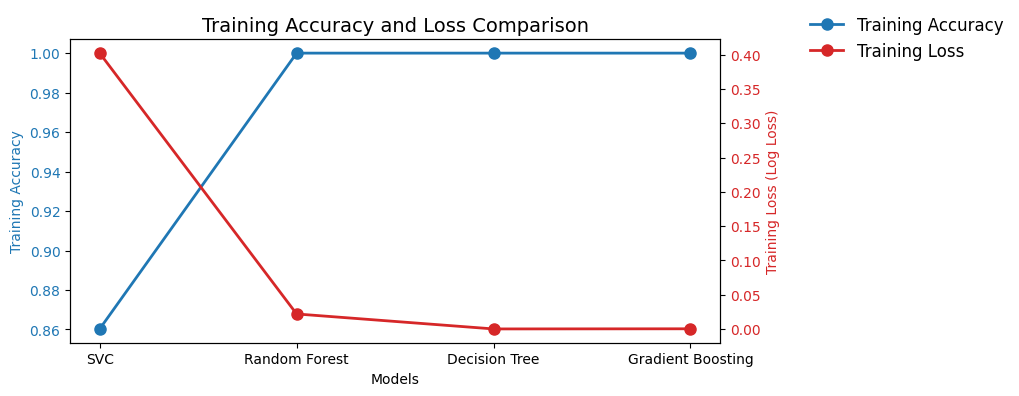

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Ensure this is imported
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Upload the CSV file (if using Google Colab)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/drive/MyDrive/air_quality/aqi_results .csv')  # Change this to the name of your uploaded file

# Data preprocessing steps
df['AQI_Level'] = df['AQI_Level'].astype('category').cat.codes  # Convert AQI_Level to numerical categories

# Separate features and target variable
X = df[['CO', 'NO2', 'Ozone', 'SO2']]  # Assuming these are your feature columns
y = df['AQI_Level']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 1: Create lists to track training accuracy and training loss
train_accuracy = []
train_loss = []

# SVM Model (Track accuracy and loss)
svm_model = SVC(kernel='linear', probability=True)  # Enabling probability to calculate log_loss
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_train_pred_prob_svm = svm_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_svm))
train_loss.append(log_loss(y_train, y_train_pred_prob_svm))

# Random Forest Model (Track accuracy and loss)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_prob_rf = rf_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_rf))
train_loss.append(log_loss(y_train, y_train_pred_prob_rf))

# Decision Tree Model (Track accuracy and loss)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_train_pred_prob_dt = dt_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_dt))
train_loss.append(log_loss(y_train, y_train_pred_prob_dt))

# Gradient Boosting Model (Track accuracy and loss)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_train_pred_gb = gb_model.predict(X_train)
y_train_pred_prob_gb = gb_model.predict_proba(X_train)

train_accuracy.append(accuracy_score(y_train, y_train_pred_gb))
train_loss.append(log_loss(y_train, y_train_pred_prob_gb))

# Step 2: Plotting training accuracy and loss on the same graph (with two y-axes)

fig, ax1 = plt.subplots(figsize=(8, 4))  # Smaller graph size

# Plotting Training Accuracy on the first y-axis
ax1.set_xlabel('Models')
ax1.set_ylabel('Training Accuracy', color='tab:blue')
ax1.plot(['SVC', 'Random Forest', 'Decision Tree', 'Gradient Boosting'], train_accuracy, marker='o', color='tab:blue', linestyle='-', linewidth=2, markersize=8, label='Training Accuracy')
ax1.set_xticks(np.arange(len(train_accuracy)))
ax1.set_xticklabels(['SVC', 'Random Forest', 'Decision Tree', 'Gradient Boosting'])
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot Training Loss
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.set_ylabel('Training Loss (Log Loss)', color='tab:red')
ax2.plot(['SVC', 'Random Forest', 'Decision Tree', 'Gradient Boosting'], train_loss, marker='o', color='tab:red', linestyle='-', linewidth=2, markersize=8, label='Training Loss')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding titles and removing gridlines
plt.title('Training Accuracy and Loss Comparison', fontsize=14)

# Remove gridlines
ax1.grid(False)

# Set background color to white for a clean look
plt.gca().set_facecolor('white')

# Add a combined legend outside the plot on the right side
fig.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12, labels=['Training Accuracy', 'Training Loss'])

# Show the plot
plt.tight_layout()
plt.show()
